# Generatori di numeri pseudocasuali in python

Cominciamo ad utilizzare il modulo ```random``` che contiene un algoritmo per la generazione di numeri casuali uniformi tra 0 e 1. 

Nel seguito introdurremo altre librerie che contengono generatori con distribuzioni non uniformi, dopo che avremo definito meglio cosa si intende per *distribuzione*.

La documentazione si trova facilmente con Google. Di seguito alcuni link:
* <a href="https://docs.python.org/3/library/random.html">random</a> (python.org)
* <a href="https://www.w3schools.com/python/module_random.asp">Python Random Module</a> (W3School)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
help(random.random)

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).



Da notare: usando lo stesso *seed* la sequenza è riproducibile.

Se non si inizializza il *seed*, viene inizializzato dall'orario di sistema.

In [2]:
random.seed(12345)

In [3]:
for i in range(10):
    print(random.random())

0.41661987254534116
0.010169169457068361
0.8252065092537432
0.2986398551995928
0.3684116894884757
0.19366134904507426
0.5660081687288613
0.1616878239293682
0.12426688428353017
0.4329362680099159


Per generare numeri casuali da un minimo $a$ ad un massimo $b$ basta:
* generare un numero casuale con ```random.random()```
* moltiplicare per $b-a$
* sommare $a$
Il risultato sarà compreso in $[a,\,b)$

In [4]:
def rnd_ab(a, b):
    return a + (b - a)*random.random()
for i in range(10):
    print(rnd_ab(-2, 2))

0.24831395230337172
-1.3026257571050728
0.21288434227731923
-0.5803944546536051
1.8322591403981945
-1.6348236044930595
1.9145599822816401
-0.351522428242796
0.015741472440149895
-1.4074153242792433


...ma questa funzionalità si ottiene dando $a$ e $b$ come argomenti della funzione ```random```:

In [5]:
for i in range(10):
    print(random.uniform(-2, 2))

0.8758685612035402
-1.2401144851127186
-0.6337582969057913
-1.9059151274311978
-0.6419289104083172
1.8699298355194856
1.9151938167426272
0.9781201605641385
-1.9861815569796177
1.7609540123909713


... a questo punto, abbiamo degli strumenti per generare numeri casuali e simulare, quindi, i risultati di un esperimento.

Però, dobbiamo definire meglio cosa significa:
* Probabilità
* Distrubuzione di probabilità

# Spunti per esercizi

Generare grafici delle distribuzioni d numeri casuali generati con il modulo ```random```:

* uniformi tra 0 e 1, come dalla funzione ```random()```
* uniformi tra due valori $a$ e $b$, come indicato sopra
* graficare la distribuzione di $x^2$, dove $x$ è un numero random uniformemente distribuito
* graficare la distribuzione di $e^x$, $1/x$, e $\mathrm{log}(x)$ 

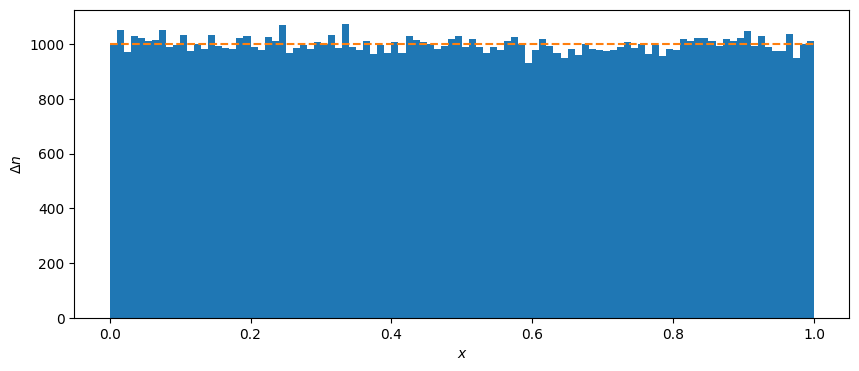

In [6]:
import matplotlib.pyplot as plt
random.seed(12345)
num = 100000
seq = [random.random() for i in range(num)]
nbins = 100
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, nbins, range=(0, 1))
avg = float(num)/nbins
ax.plot((0, 1),(avg, avg), '--')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$\Delta n$')
plt.show()

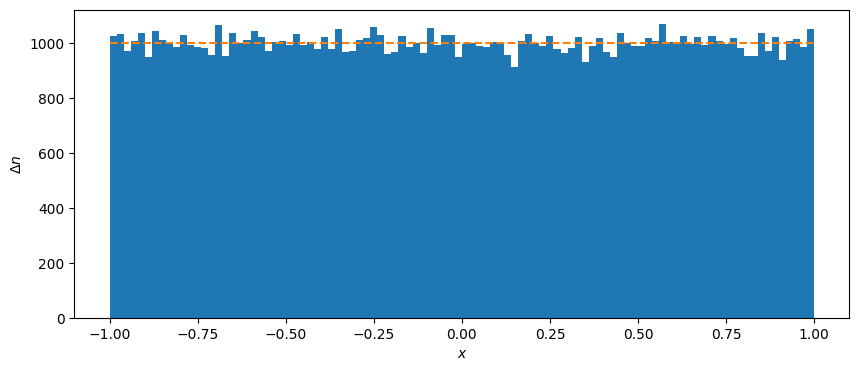

In [7]:
a, b = -1, +1
num = 100000
seq = [random.uniform(a, b) for i in range(num)]
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, 100, range=(a, b))
avg = float(num)/nbins
ax.plot((a, b),(avg, avg), '--')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$\Delta n$')
plt.show()

La densità di valori $x$ sarà uniforme, ossia:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} = 1$$

Trasformando $x$ in $y$:
$$y = x^2$$

posso trasformare la densità di valori in $x$ nell'equivalente densità di valori in $y$:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}y} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x^2} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} \frac{\mathrm{d}x}{\mathrm{d}x^2} = \frac{1}{2x} = \frac{1}{2\sqrt{y}}$$

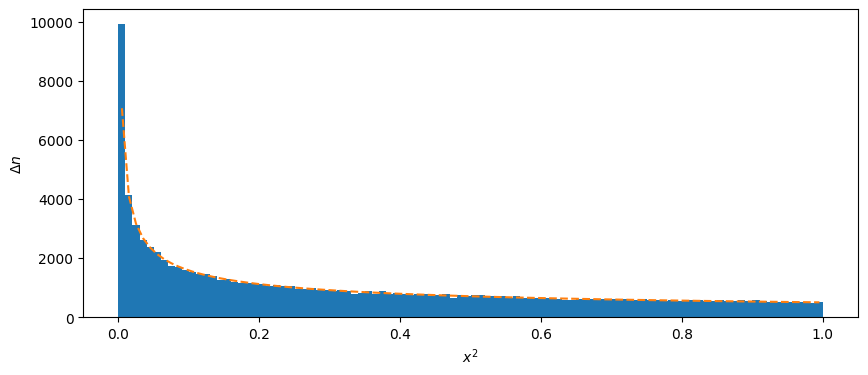

In [ ]:
num = 100000
seq = [random.random()**2 for i in range(num)]
nbins = 100
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, nbins, range=(0, 1))
dx = bins[1]-bins[0]
xs = (bins[1:]+bins[:-1])/2
ys = num*dx/(2*np.sqrt(xs))
ax.plot(xs, ys, '--')
ax.set_xlabel('$x^2$')
ax.set_ylabel(r'$\Delta n$')
plt.show()

La densità di valori $x$ sarà uniforme, ossia:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} = 1$$

Trasformando $x$ in $y$:
$$y = e^x$$

posso trasformare la densità di valori in $x$ nell'equivalente densità di valori in $y$:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}y} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}e^x} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} \frac{\mathrm{d}x}{\mathrm{d}e^x} = \frac{1}{e^x} = \frac{1}{y}$$

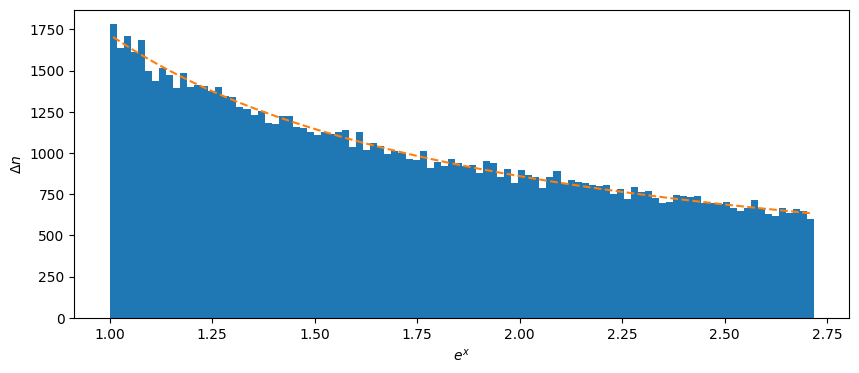

In [19]:
num = 100000
seq = [np.exp(random.random()) for i in range(num)]
nbins = 100
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, nbins, range=(1, np.e))
dx = bins[1]-bins[0]
xs = (bins[1:]+bins[:-1])/2
ys = num*dx/xs
ax.plot(xs, ys, '--')
ax.set_xlabel('$e^x$')
ax.set_ylabel(r'$\Delta n$')
plt.show()

La densità di valori $x$ sarà uniforme, ossia:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} = 1$$

Trasformando $x$ in $y$:
$$y = \frac{1}{x}$$

posso trasformare la densità di valori in $x$ nell'equivalente densità di valori in $y$:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}y} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x^{-1}} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} \left|\frac{\mathrm{d}x}{\mathrm{d}x^{-1}}\right| = \frac{1}{x^{-2}} = \frac{1}{y^2}$$

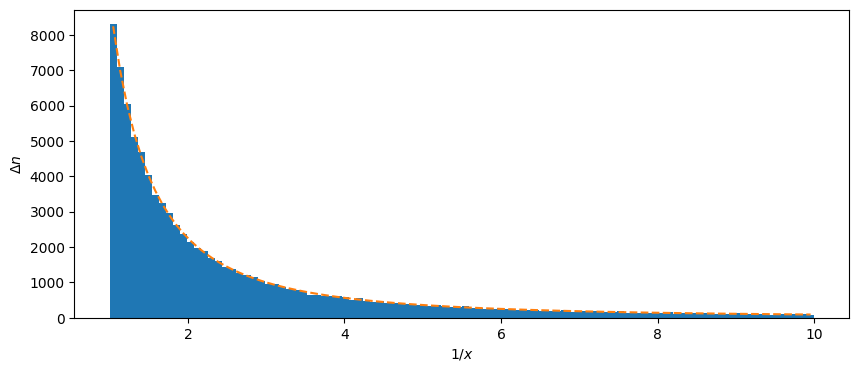

In [29]:
num = 100000
seq = [1/random.random() for i in range(num)]
nbins = 100
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, nbins, range=(1, 10))
dx = bins[1]-bins[0]
xs = (bins[1:]+bins[:-1])/2
ys = num*dx/(xs**2)
ax.plot(xs, ys, '--')
ax.set_xlabel('$1/x$')
ax.set_ylabel(r'$\Delta n$')
plt.show()

La densità di valori $x$ sarà uniforme, ossia:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} = 1$$

Trasformando $x$ in $y$:
$$y = \log{x}$$

posso trasformare la densità di valori in $x$ nell'equivalente densità di valori in $y$:
$$\frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}y} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}\log x} = \frac{1}{N}\frac{\mathrm{d}n}{\mathrm{d}x} \left|\frac{\mathrm{d}x}{\mathrm{d}\log x}\right| = x = e^y$$

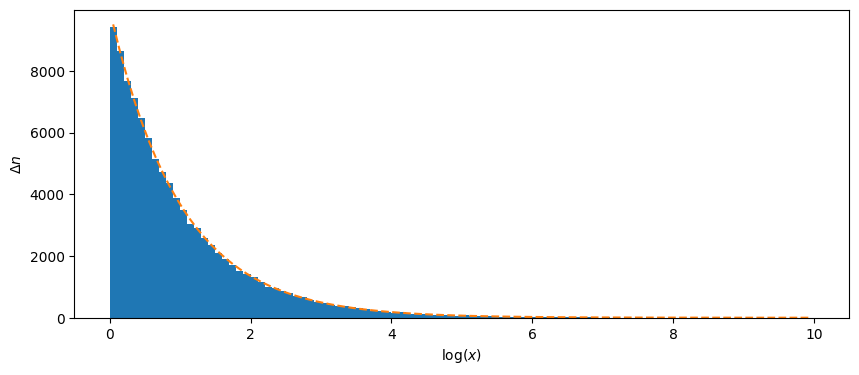

In [34]:
num = 100000
seq = [-np.log(1 - random.random()) for i in range(num)]
nbins = 100
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, nbins, range=(0, 10))
dx = bins[1]-bins[0]
xs = (bins[1:]+bins[:-1])/2
ys = num*dx*np.exp(-xs)
ax.plot(xs, ys, '--')
ax.set_xlabel('$\log(x)$')
ax.set_ylabel(r'$\Delta n$')
plt.show()